In [1]:
#Import Python Libraries

In [2]:
import numpy as np
import pandas as pd
import missingno as mn
from collections import Counter

In [3]:
#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

In [4]:
# setting up plot style 
sns.set_context("paper")
style.use('fivethirtyeight')

In [5]:
# ml
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
#Importing the input files
titanic_train = pd.read_csv('../Titanic/train.csv')
titanic_test = pd.read_csv('../Titanic/test.csv')

In [9]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
combined=titanic_train.append(titanic_test)

In [12]:
# Database dimension
print("Database dimension : ")
print("Database dimension - titanic_train     :",titanic_train.shape)
print("Database dimension - titanic_test      :",titanic_test.shape)
print("Database dimension - combined          :",combined.shape)

print('\n')

Database dimension : 
Database dimension - titanic_train     : (891, 12)
Database dimension - titanic_test      : (418, 11)
Database dimension - combined          : (1309, 12)




In [13]:
#Database size
print("Database size : ")
print("Database size - titanic_train          :",titanic_train.size)
print("Database size - titanic_test           :",titanic_test.size)
print("Database size - combined               :",combined.size)

Database size : 
Database size - titanic_train          : 10692
Database size - titanic_test           : 4598
Database size - combined               : 15708


In [14]:
#Database column types
print("Titanic Train Dataset Info : ")
print(titanic_train.info())
print("_"* 40)
print("Titanic Test Dataset Info : ")
print(titanic_test.info())

Titanic Train Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
________________________________________
Titanic Test Dataset Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  

Insights: Numerical Features : PassengerId, Age, Fare, SibSp, Parch Categorical Features : Pclass, Name, Sex, Embarked

In [15]:
# Checking the numerical variables in train and test data set
titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:>

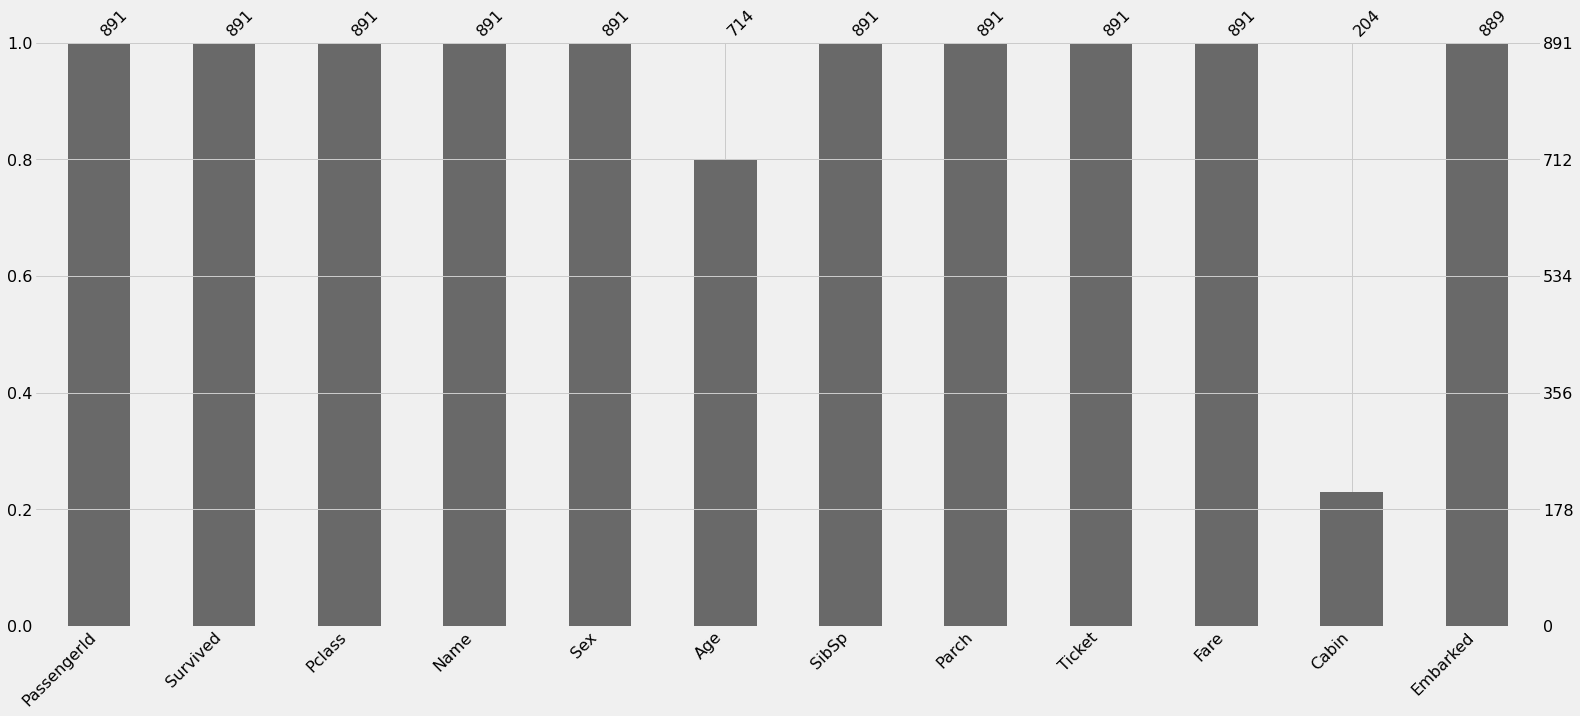

In [16]:
mn.bar(titanic_train)

In [17]:
# Column wise null values in train data set 
null_train_perc = pd.DataFrame((titanic_train.isnull().sum())*100/titanic_train.shape[0]).reset_index()
null_train_perc.columns = ['Column Name', 'Null Values Percentage']
null_train_value = pd.DataFrame(titanic_train.isnull().sum()).reset_index()
null_train_value.columns = ['Column Name', 'Null Values']
null_train = pd.merge(null_train_value, null_train_perc, on='Column Name')
null_train

,Column Name,Null Values,Null Values Percentage
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,19.865320
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


Insights: Cabin - has 687 rows which is 77% of the data missing. There is no point trying to fill the data Age - has 117 likes which is around 20% of the data missing. Age imputation will be followed in later section embarked - has 2 missing values. Data imputation will be followed in later section

<AxesSubplot:>

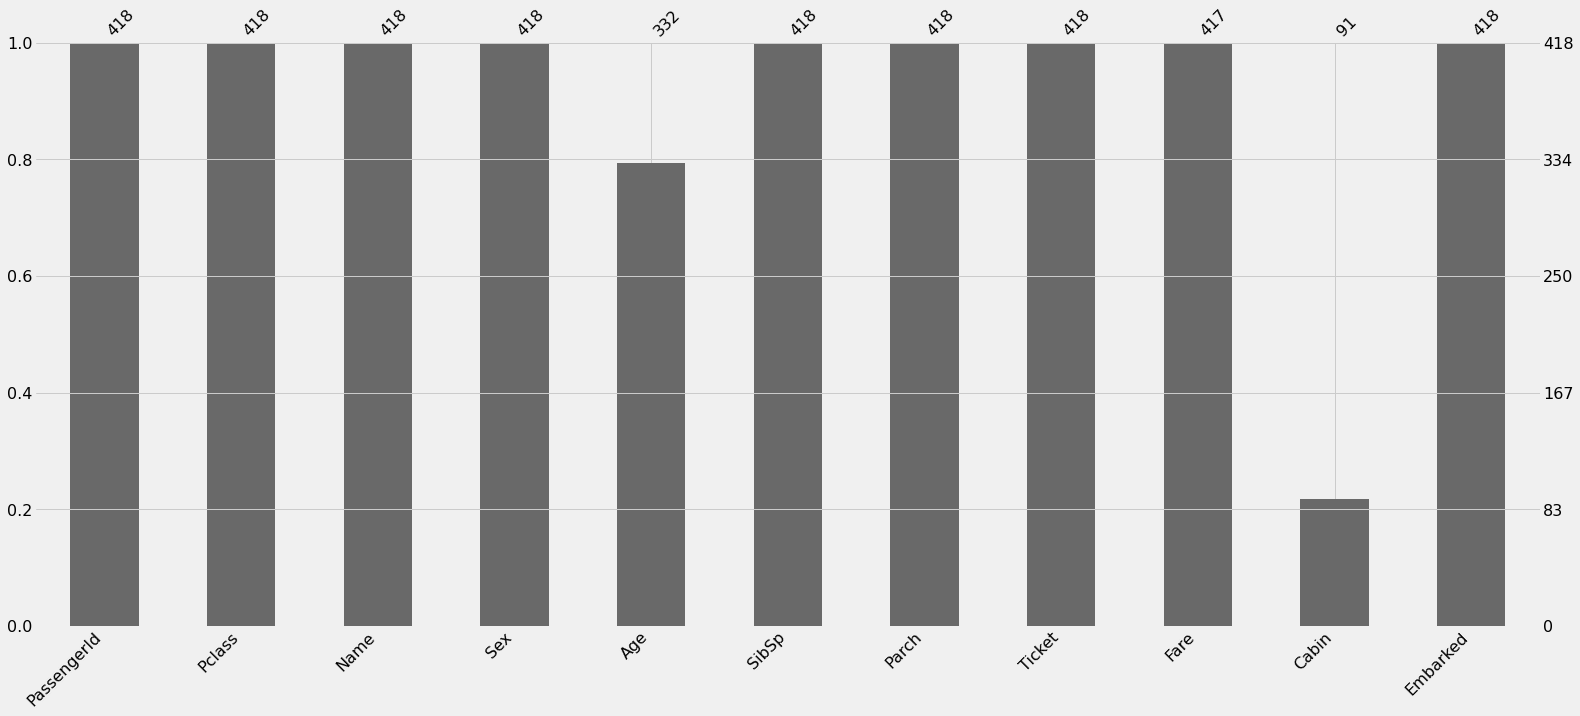

In [18]:
mn.bar(titanic_test)

In [19]:
# Column wise null values in test data set
null_test_perc = pd.DataFrame((titanic_test.isnull().sum())*100/titanic_test.shape[0]).reset_index()
null_test_perc.columns = ['Column Name', 'Null Values Percentage']
null_test_value = pd.DataFrame(titanic_test.isnull().sum()).reset_index()
null_test_value.columns = ['Column Name', 'Null Values']
null_test = pd.merge(null_test_value, null_test_perc, on='Column Name')
null_test

,Column Name,Null Values,Null Values Percentage
0,PassengerId,0,0.000000
1,Pclass,0,0.000000
2,Name,0,0.000000
3,Sex,0,0.000000
4,Age,86,20.574163
5,SibSp,0,0.000000
6,Parch,0,0.000000
7,Ticket,0,0.000000
8,Fare,1,0.239234
9,Cabin,327,78.229665


Insights: Cabin - has 327 rows which is 78% of the data missing. There is no point trying to fill the data Age - has 86 likes which is around 20.6% of the data missing. Age imputation will be followed in later section Fare - has 1 missing value. Data imputation will be followed in later section

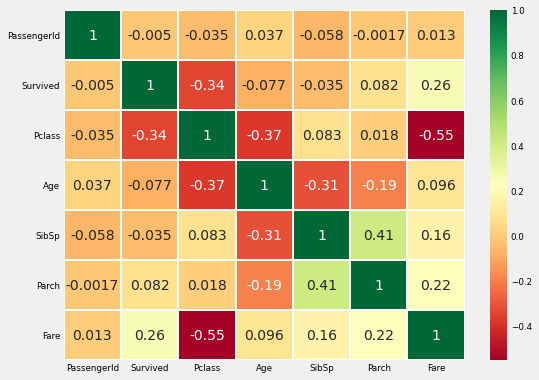

In [20]:
# checking the correlation among the numeric variables
plt.figure(figsize = (8,6))
ax= sns.heatmap(titanic_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

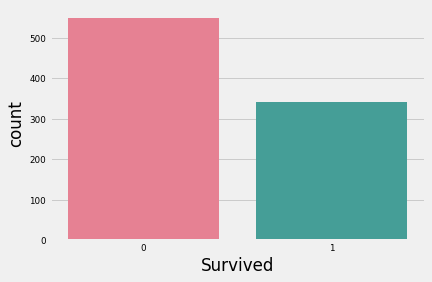

In [21]:
#survived
sns.countplot(titanic_train['Survived'], palette = 'husl')
plt.show()

In [22]:
titanic_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [23]:
#age

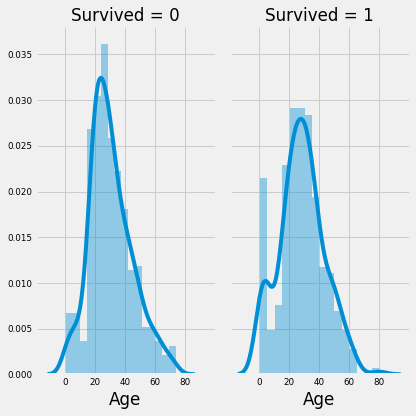

In [24]:
ax = sns.FacetGrid(titanic_train, col='Survived',height = 6, aspect =0.5)
ax.map(sns.distplot, "Age")
plt.show()

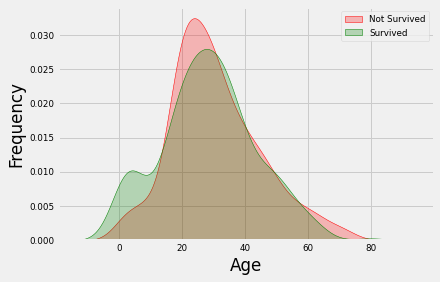

In [25]:
ax = sns.kdeplot(titanic_train["Age"][(titanic_train["Survived"] == 0) & (titanic_train["Age"].notnull())], color="Red", shade = True)
ax = sns.kdeplot(titanic_train["Age"][(titanic_train["Survived"] == 1) & (titanic_train["Age"].notnull())], ax =ax, color="Green", shade= True)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax = ax.legend(["Not Survived","Survived"])

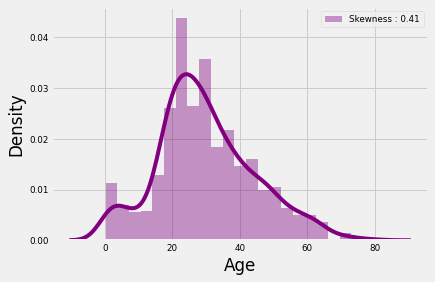

In [26]:
# Overall age distribution of combined test & train database
ax = sns.distplot(combined["Age"], color="purple", label="Skewness : %.2f"%(combined["Age"].skew()))
ax = ax.legend(loc="best")
plt.show()

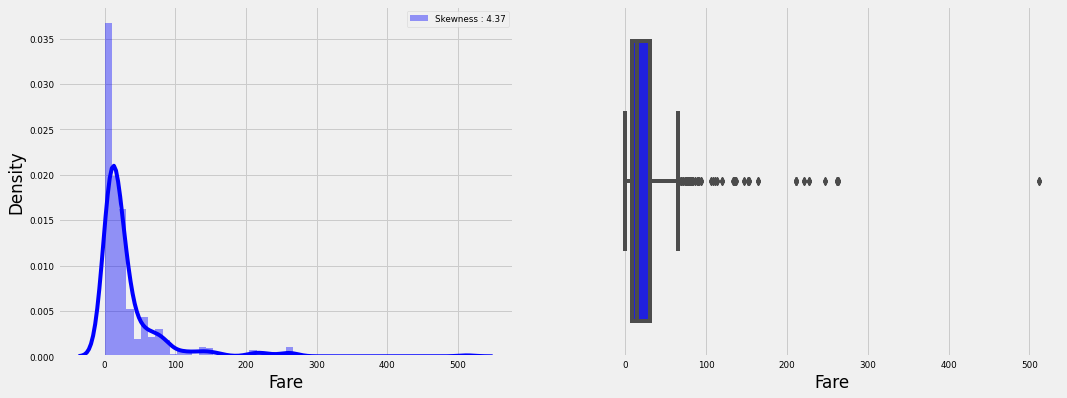

In [27]:
# Overall Fare distribution of combined test & train database
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
ax = sns.distplot(combined["Fare"], color="blue", label="Skewness : %.2f"%(combined["Fare"].skew()))
ax = ax.legend(loc="best")
plt.subplot(1,2,2)
sns.boxplot(combined["Fare"],color="blue")
plt.show()

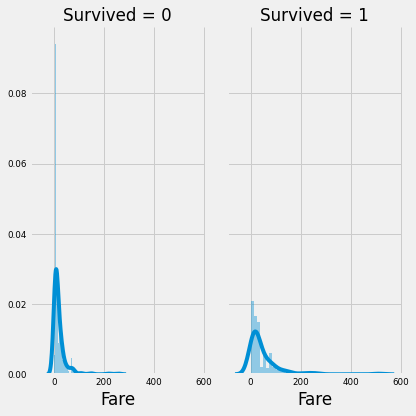

In [28]:
ax = sns.FacetGrid(titanic_train, col='Survived',height = 6, aspect =0.5)
ax.map(sns.distplot, "Fare")
plt.show()

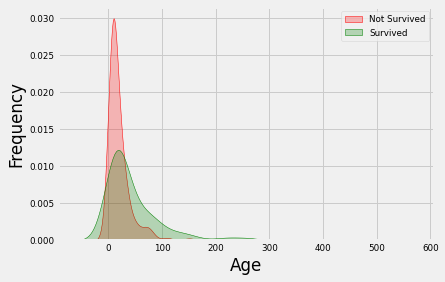

In [29]:
ax = sns.kdeplot(combined["Fare"][(combined["Survived"] == 0) & (combined["Fare"].notnull())], color="Red", shade = True)
ax = sns.kdeplot(combined["Fare"][(combined["Survived"] == 1) & (combined["Fare"].notnull())], ax =ax, color="Green", shade= True)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax = ax.legend(["Not Survived","Survived"])

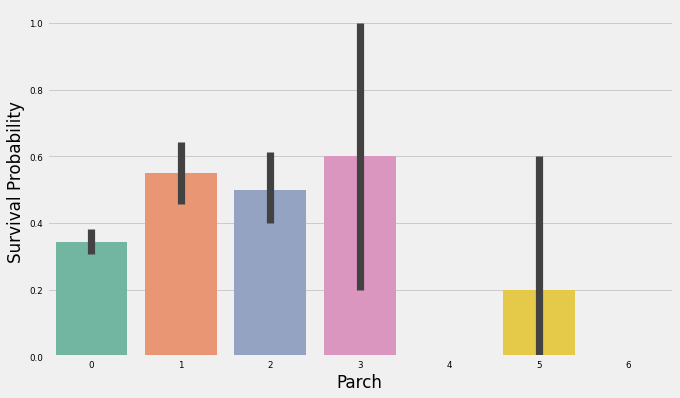

In [30]:
#parch
plt.figure(figsize = (10,6))
sns.barplot(x="Parch", y="Survived",data = titanic_train,palette="Set2")
plt.ylabel("Survival Probability")
plt.show()

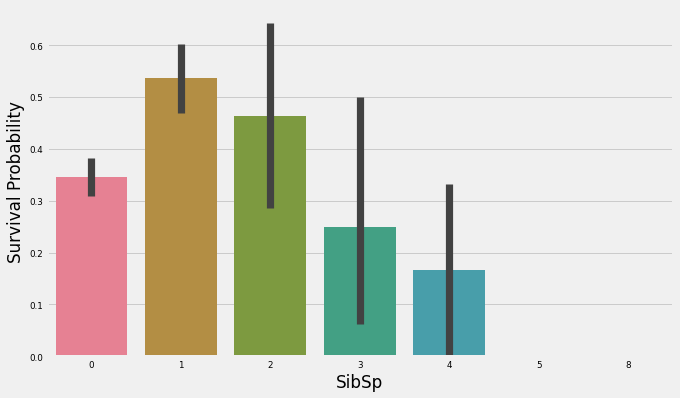

In [31]:
#SibSp
plt.figure(figsize = (10,6))
sns.barplot(x="SibSp", y="Survived",data = titanic_train,palette="husl")
plt.ylabel("Survival Probability")
plt.show()

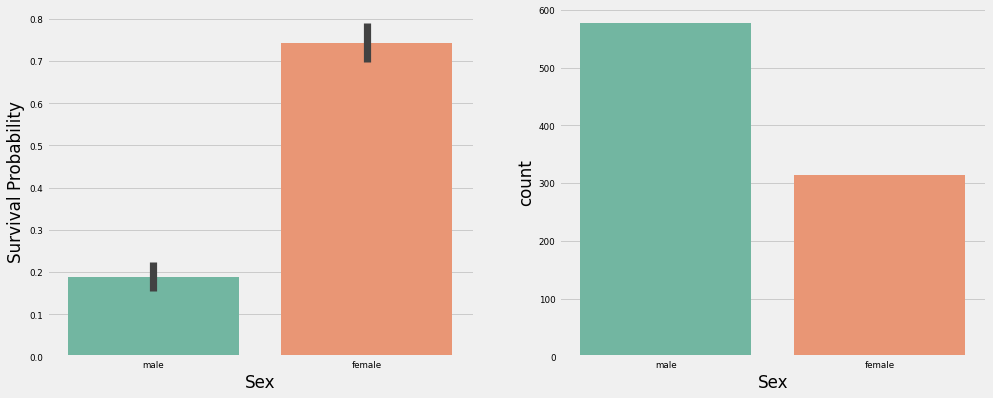

In [32]:
#sex
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(x="Sex", y="Survived",data = titanic_train,palette="Set2")
plt.ylabel("Survival Probability")
plt.subplot(1,2,2)
sns.countplot("Sex",data = titanic_train,palette="Set2")
plt.show()

In [33]:
titanic_train[["Sex","Survived"]].groupby('Sex').agg({"mean","count"})

Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908

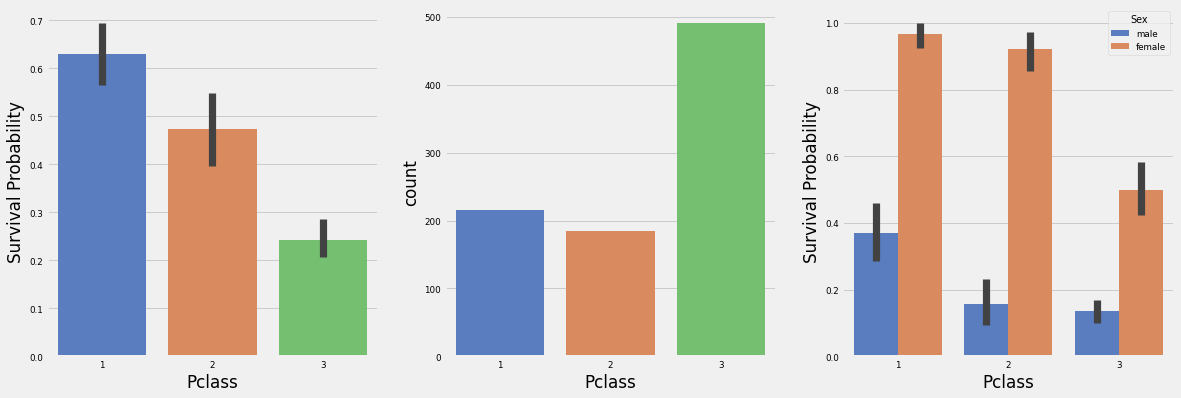

In [34]:
#pclass
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.barplot(x="Pclass", y="Survived",data = titanic_train,palette="muted")
plt.ylabel("Survival Probability")
plt.subplot(1,3,2)
sns.countplot("Pclass",data = titanic_train,palette="muted")
plt.subplot(1,3,3)
sns.barplot(x="Pclass", y="Survived",data = titanic_train,hue = "Sex",palette="muted")
plt.ylabel("Survival Probability")
plt.show()

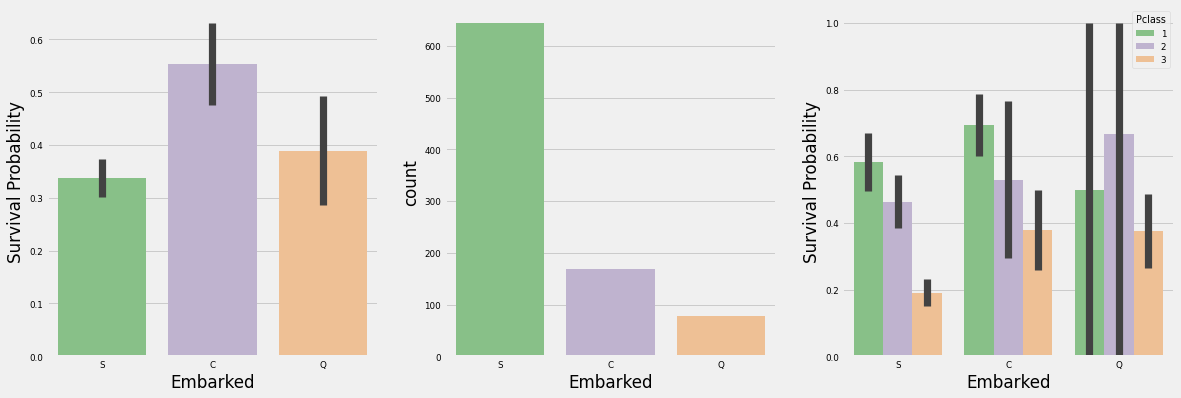

In [35]:
#embarked
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.barplot(x="Embarked", y="Survived",data = titanic_train,palette="Accent")
plt.ylabel("Survival Probability")
plt.subplot(1,3,2)
sns.countplot("Embarked",data = titanic_train,palette="Accent")
plt.subplot(1,3,3)
sns.barplot(x="Embarked", y="Survived",data = titanic_train,hue = "Pclass",palette="Accent")
plt.ylabel("Survival Probability")
plt.show()

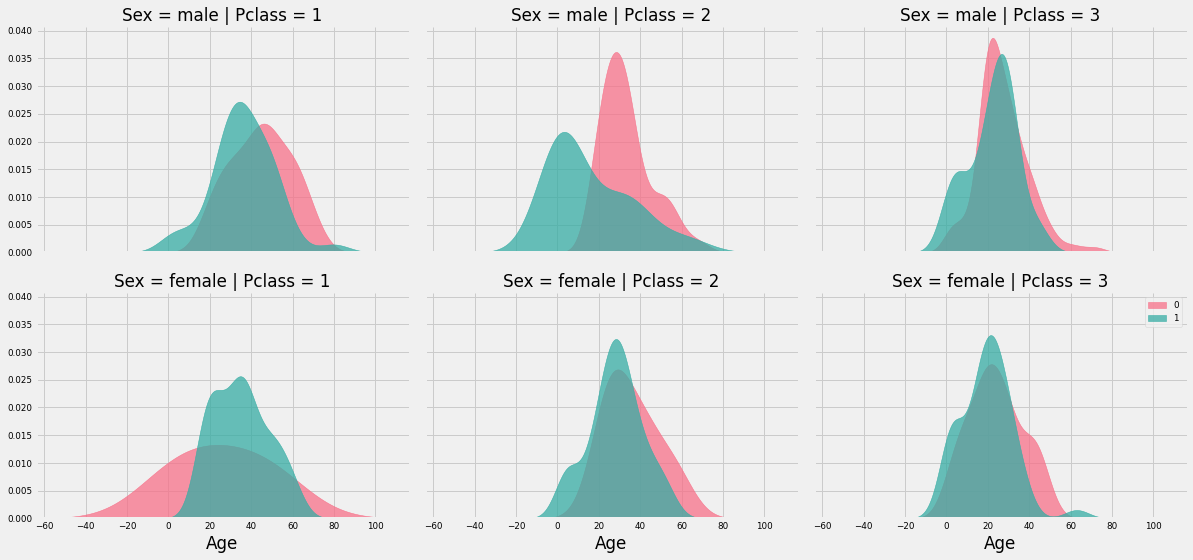

In [36]:
ax= sns.FacetGrid(data = titanic_train, row = 'Sex', col = 'Pclass', hue = 'Survived',palette = 'husl',height = 4, aspect = 1.4)
ax.map(sns.kdeplot, 'Age', alpha = .75, shade = True)
plt.legend()

# Data Cleaning

In [37]:
display(combined[combined.Fare.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [38]:
for df in [titanic_train, titanic_test, combined]:
    df['PeopleInTicket']=df['Ticket'].map(combined['Ticket'].value_counts()) # Getting the unique count of tickets
    df['FarePerPerson']=df['Fare']/df['PeopleInTicket'] 


print('Mean fare for this category: ', titanic_train[(titanic_train.Embarked=='S') & (titanic_train.Pclass==3)]['FarePerPerson'].mean())

Mean fare for this category:  7.382647773383368


In [39]:

titanic_test.loc[titanic_test.Fare.isnull(), ['Fare','FarePerPerson']] = round(titanic_train[(titanic_train.Embarked=='S')& (titanic_train.Pclass==3)\
                                                                          & (titanic_train.PeopleInTicket==1)]['Fare'].mean(),1)
display(titanic_test[titanic_test.Fare.isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson


In [40]:
# Embarked Imputation

In [41]:
display(combined[combined.Embarked.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2,40.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2,40.0


In [42]:
# Groupby Embarked and check some statistics
titanic_train[titanic_train.Pclass==1].groupby(['Embarked',"Pclass"]).agg({'FarePerPerson': 'mean', 'Fare': 'mean', 'PassengerId': 'count'})

,,FarePerPerson,Fare,PassengerId
Embarked,Pclass,,,
C,1,39.179223,104.718529,85
Q,1,30.000000,90.000000,2
S,1,30.211849,70.364862,127


In [43]:
# Updating the Embarked location for the two missing values
titanic_train.loc[titanic_train.PassengerId==62,'Embarked']="C"
titanic_train.loc[titanic_train.PassengerId==830,'Embarked']="C"
display(titanic_train[titanic_train.Embarked.isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson


In [44]:
#Age Imputation

In [45]:
titanic_train['Title'], titanic_test['Title'] = [df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) for df in [titanic_train, titanic_test]]

In [46]:
# Extracting the statistics of Title on Train dataset
titanic_train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title    Pclass                  
Capt     1       70.000000      1
Col      1       58.000000      2
Countess 1       33.000000      1
Don      1       40.000000      1
Dr       1       43.750000      4
         2       38.500000      2
Jonkheer 1       38.000000      1
Lady     1       48.000000      1
Major    1       48.500000      2
Master   1        5.306667      3
         2        2.258889      9
         3        5.350833     24
Miss     1       30.000000     45
         2       22.390625     32
         3       16.123188     69
Mlle     1       24.000000      2
Mme      1       24.000000      1
Mr       1       41.580460     87
         2       32.768293     82
         3       28.724891    229
Mrs      1       40.882353     34
         2       33.682927     41
         3       33.515152     33
Ms       2       28.000000      1
Rev      2       43.166667      6
Sir      1       49.000000      1

In [47]:
TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty", \
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty", \
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr", \
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [48]:
titanic_train['Title'], titanic_test['Title'] = [df.Title.map(TitleDict) for df in [titanic_train, titanic_test]]

# Let us now reprint the groups
titanic_train.groupby(['Title', 'Pclass'])['Age'].agg(['mean', 'count'])

mean  count
Title   Pclass                  
Master  1        5.306667      3
        2        2.258889      9
        3        5.350833     24
Miss    1       29.744681     47
        2       22.390625     32
        3       16.123188     69
Mr      1       41.580460     87
        2       32.768293     82
        3       28.724891    229
Mrs     1       40.400000     35
        2       33.547619     42
        3       33.515152     33
Officer 1       56.600000      5
Royalty 1       42.555556      9
        2       42.000000      8

In [49]:
# Checking for Master Title with Age missing
display(combined[(combined.Age.isnull()) & (combined.Name.str.contains('Master'))])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,3,5.081933
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11,6.322727
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,5,5.093340
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,3,5.081933
244,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,5.862500
339,1231,NaN,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C,1,7.229200
344,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,3,4.833333
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,3,7.452767


In [50]:
print("Average age for Masters in Pclass 3 : ", round(titanic_train[titanic_train.Name.str.contains('Master')]['Age'].mean(),2))
print("Maximum age for Masters in Pclass 3 : ", round(combined[combined.Name.str.contains('Master')]['Age'].max(),2))

Average age for Masters in Pclass 3 :  4.57
Maximum age for Masters in Pclass 3 :  14.5


In [51]:
# Assigning the max value to the age of passenger with title Master and travelling alone
titanic_test.loc[titanic_test.PassengerId==1231,'Age']=14

In [52]:
for df in [titanic_train, titanic_test]:
    df.loc[(df.Title=='Miss') & (df.Parch!=0) & (df.PeopleInTicket>1), 'Title']="FemaleChild"

# Extracting the statistics
print(titanic_train.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'}))
print("_"*60)
print(titanic_test.groupby(['Pclass','Sex','Title'])['Age'].agg({'mean', 'median', 'count'}))

                           count       mean  median
Pclass Sex    Title                                
1      female FemaleChild     14  21.071429    19.5
              Miss            33  33.424242    30.0
              Mrs             35  40.400000    40.0
              Royalty          3  43.333333    48.0
       male   Master           3   5.306667     4.0
              Mr              87  41.580460    40.0
              Officer          5  56.600000    56.0
              Royalty          6  42.166667    42.0
2      female FemaleChild     12   9.916667     6.5
              Miss            20  29.875000    29.0
              Mrs             42  33.547619    31.5
       male   Master           9   2.258889     1.0
              Mr              82  32.768293    31.0
              Royalty          8  42.000000    46.5
3      female FemaleChild     25   6.500000     5.0
              Miss            44  21.590909    21.0
              Mrs             33  33.515152    31.0
       male 

In [53]:
# Checking female child with missing age

display(titanic_train[(titanic_train.Age.isnull()) & (titanic_train.Title=='FemaleChild')])
display(titanic_test[(titanic_test.Age.isnull()) & (titanic_test.Title=='FemaleChild')])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,3,7.452767,FemaleChild
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,6.322727,FemaleChild
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,5,5.093340,FemaleChild
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,5,5.093340,FemaleChild
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,5,5.093340,FemaleChild
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,6.322727,FemaleChild
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,6.322727,FemaleChild
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,5.862500,FemaleChild


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727,FemaleChild


In [54]:
# Creating a lookup table to fill the missing age values
grp = titanic_train.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grp

,Sex,Pclass,Title,Age
0,female,1,FemaleChild,21.071429
1,female,1,Miss,33.424242
2,female,1,Mrs,40.400000
3,female,1,Royalty,43.333333
4,male,1,Master,5.306667
5,male,1,Mr,41.580460
6,male,1,Officer,56.600000
7,male,1,Royalty,42.166667
8,female,2,FemaleChild,9.916667
9,female,2,Miss,29.875000


In [55]:
# Upfating the missing age based on above lookup table
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]
titanic_train['Age'], titanic_test['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [titanic_train, titanic_test]]

In [56]:
# Checking to see if any null value exists
print(titanic_train.Age.isnull().sum())
print("_"*50)
print(titanic_test.Age.isnull().sum())

0
__________________________________________________
0


In [57]:
# Outlier Treatment

In [58]:
#Function to identify outliers
def outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25) # First quartile range
        Q3 = np.percentile(df[col],75) # Third quartile range
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers  

In [59]:
# Extracting the outliers IDs
Outliers_id = outliers(titanic_train, 2, ["Age", "SibSp", "Parch", "Fare"])
print(Outliers_id,'\n')
print(titanic_train.loc[Outliers_id])

[438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863] 

     PassengerId  Survived  Pclass                               Name     Sex  \
438          439         0       1                  Fortune, Mr. Mark    male   
587          588         1       1   Frolicher-Stehli, Mr. Maxmillian    male   
745          746         0       1       Crosby, Capt. Edward Gifford    male   
27            28         0       1     Fortune, Mr. Charles Alexander    male   
88            89         1       1         Fortune, Miss. Mabel Helen  female   
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
341          342         1       1     Fortune, Miss. Alice Elizabeth  female   
792          793         0       3         

In [60]:
# Dropping the outliers
titanic_train = titanic_train.drop(Outliers_id, axis = 0).reset_index(drop=True)
titanic_train.shape

(878, 15)

# Feature Engineering


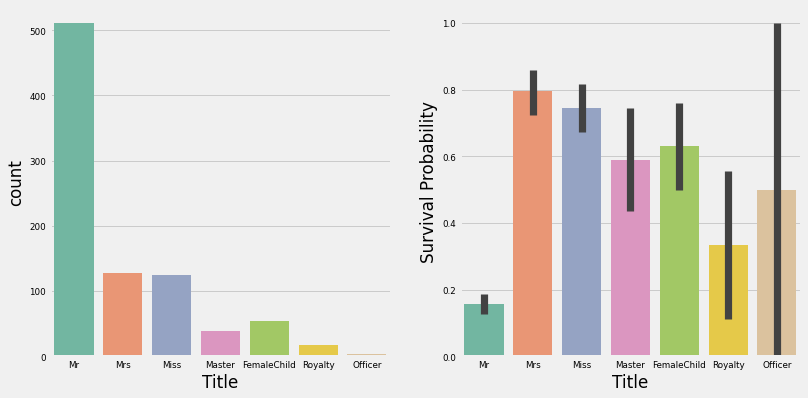

In [61]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(titanic_train['Title'], palette = 'Set2')
plt.subplot(1,2,2)
sns.barplot(x= "Title",y = "Survived", data = titanic_train, palette = "Set2")
plt.ylabel("Survival Probability")
plt.show()

In [62]:
# Checking if test dataset has any null values for Title
display(titanic_test[(titanic_test.Title.isnull())])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,3,36.3,NaN


In [63]:
titanic_test.loc[titanic_test.PassengerId==1306,'Title']="Royalty"

In [64]:
#family siz feature
for dataset in [titanic_train,titanic_test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.25000,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,Miss,1


In [65]:
for dataset in [titanic_train,titanic_test]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
titanic_train.head(3)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.25000,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,Miss,1,1


In [67]:
#cabin feature
for dataset in [titanic_train,titanic_test]:
    dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])
titanic_train["Cabin"].value_counts() 

X    680
C     55
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

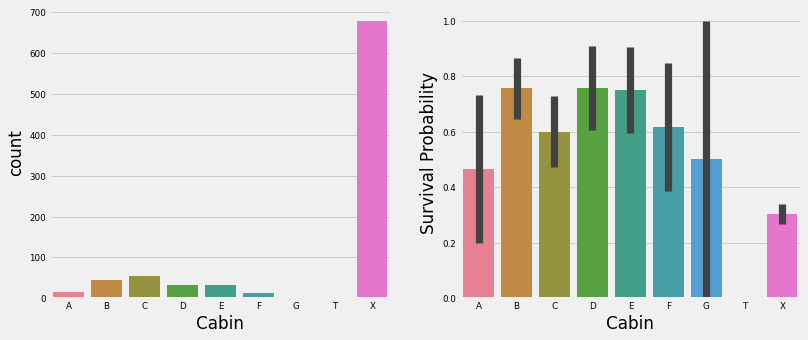

In [68]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(titanic_train['Cabin'], palette = 'husl',order=['A','B','C','D','E','F','G','T','X'])
plt.subplot(1,2,2)
sns.barplot(x= "Cabin",y = "Survived", data = titanic_train, palette = "husl",order=['A','B','C','D','E','F','G','T','X'])
plt.ylabel("Survival Probability")
plt.show()

In [69]:
#age binning
for dataset in [titanic_train,titanic_test]:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4

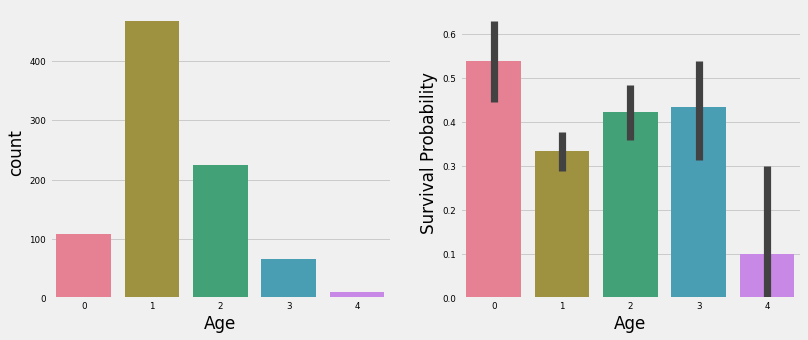

In [70]:
# plotting the data based on new age classification
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(titanic_train['Age'], palette = 'husl')
plt.subplot(1,2,2)
sns.barplot(x= "Age",y = "Survived", data = titanic_train, palette = "husl")
plt.ylabel("Survival Probability")
plt.show()

In [86]:
#fare binning
for dataset in [titanic_train,titanic_test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int) 

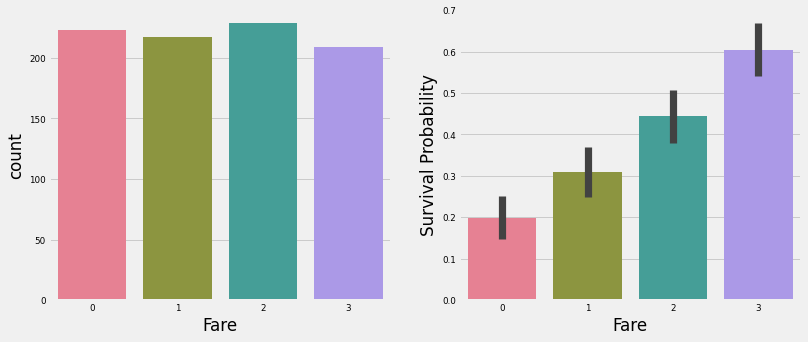

In [72]:
# plotting the data based on new age classification
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(titanic_train['Fare'], palette = 'husl')
plt.subplot(1,2,2)
sns.barplot(x= "Fare",y = "Survived", data = titanic_train, palette = "husl")
plt.ylabel("Survival Probability")
plt.show()

# Model Bulding


In [89]:
label = LabelEncoder()
for dataset in [titanic_train,titanic_test]:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['Cabin_Code'] = label.fit_transform(dataset['Cabin'])

In [90]:
#After Label Encoding
display(titanic_train.head(3))
display(titanic_test.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,PeopleInTicket,FarePerPerson,Title,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,Cabin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,...,S,1,7.25000,Mr,2,0,1,2,3,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,0,...,C,2,35.64165,Mrs,2,0,0,0,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,0,...,S,1,7.92500,Miss,1,1,0,2,2,8


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleInTicket,FarePerPerson,Title,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,Cabin_Code
0,892,3,"Kelly, Mr. James",male,2,0,0,330911,0,X,Q,1,7.8292,Mr,1,1,1,1,3,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,0,X,S,1,7.0000,Mrs,2,0,0,2,4,7
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,0,X,Q,1,9.6875,Mr,1,1,1,1,3,7


In [75]:
Features = ["Survived","Pclass","Age","Fare","FamilySize","Sex_Code","Embarked_Code","Title_Code","Cabin_Code"]
Features_test = ["Pclass","Age","Fare","FamilySize","Sex_Code","Embarked_Code","Title_Code","Cabin_Code"]
train_data = titanic_train[Features]
train_data.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_Code,Embarked_Code,Title_Code,Cabin_Code
0,0,3,1,0,2,1,2,3,8
1,1,1,2,3,2,0,0,4,2
2,1,3,1,1,1,0,2,2,8
3,1,1,2,3,2,0,2,4,2
4,0,3,2,1,1,1,2,3,8


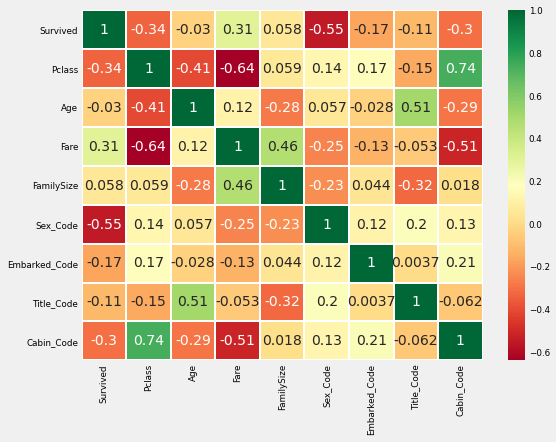

In [91]:
# Checking the correlation of the features
plt.figure(figsize = (8,6))
ax= sns.heatmap(train_data.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [77]:
y_train = train_data["Survived"]
X_train = train_data.drop(['Survived'], axis=1)
X_test = titanic_test[Features_test]
print(X_train.shape, y_train.shape, X_test.shape)

(878, 8) (878,) (418, 8)


In [78]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print ("Accuracy of the Logistic Regression model : ",acc_log)

Accuracy of the Logistic Regression model :  79.38


In [79]:
# Feature importance
coeff = pd.DataFrame(X_train.columns)
coeff.columns = ['Features_test']
coeff["Correlation"] = pd.Series(logreg.coef_[0])
coeff.sort_values(by='Correlation', ascending=False)

,Features_test,Correlation
2,Fare,0.244055
6,Title_Code,0.013003
7,Cabin_Code,-0.087134
5,Embarked_Code,-0.188778
3,FamilySize,-0.274047
1,Age,-0.625024
0,Pclass,-0.778110
4,Sex_Code,-2.643002


In [80]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, random_state=22)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print ("Accuracy of the Random Forest model : ",acc_random_forest)

Accuracy of the Random Forest model :  90.77


In [81]:
feature_imp = pd.Series(random_forest.feature_importances_,index=Features_test).sort_values(ascending=False)
feature_imp

Sex_Code         0.244139
Title_Code       0.163856
FamilySize       0.123895
Cabin_Code       0.119669
Fare             0.102450
Pclass           0.100363
Age              0.091047
Embarked_Code    0.054581
dtype: float64

<AxesSubplot:>

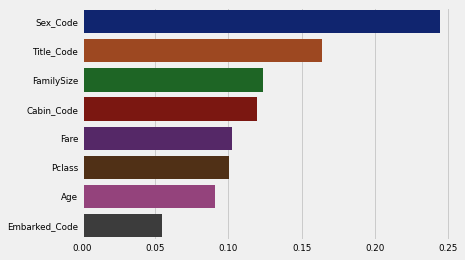

In [82]:
sns.barplot(feature_imp.values,feature_imp.index,palette='dark')

In [83]:
#Output Submission

In [84]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": y_pred})

In [87]:
# Saving the filtered data into new file
submission.to_csv('../Titanic/submission.csv')